<div style="background-color: teal; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold; color: white;">
    GROUP 1 - PYTHON PROJECT - RETAIL SALES DATA - HERO VIRED - ABADS - BATCH 10
</div>

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
    STEP - 1 : Importing All The Libraries
</div>

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
   STEP - 2 : Data Quality and Check (Task 1)
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    1. Create a consolidated view of data by joining the data present in three files.
</div>

In [2]:
# Opening the text file.
with open (r'C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\demographics.txt') as file:
        columns = file.readline().strip().split('\t')
        data = []
        for line in file:
            row = line.strip().split('\t')
            data.append(row)

In [3]:
df = pd.DataFrame(data, columns=columns)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP


In [5]:
df.shape

(2240, 9)

In [6]:
# Opening behaviour json file
with open(r"C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\behaviour.json") as f:
    data = json.load(f)

# Initialize an empty list to store dictionaries
rows = []

# Iterate over each dictionary in the list
for item in data:
    # Extract the ID and attributes from the dictionary
    id_ = list(item.keys())[0]
    attributes = item[id_]
    
    # Create a dictionary with ID as a key and attributes
    row = {'ID': id_}
    row.update(attributes)
    rows.append(row)

# Create a DataFrame from the list of dictionaries
df1 = pd.DataFrame(rows)

In [7]:
df1.shape

(2240, 13)

In [8]:
df1.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,6,16,24,11,0,34,2,3,1,2,7


In [9]:
# Opening Campaign json file.
with open(r"C:\Users\shikh\OneDrive\Desktop\Capstone Project\Retail_Sales_ABADS\campaign.json") as f:
    data = json.load(f)

# Initialize an empty list to store dictionaries
rows = []

# Iterate over each dictionary in the list
for item in data:
    # Extract the ID and attributes from the dictionary
    id_ = list(item.keys())[0]
    attributes = item[id_]
    
    # Create a dictionary with ID as a key and attributes
    row = {'ID': id_}
    row.update(attributes)
    rows.append(row)

# Create a DataFrame from the list of dictionaries
df2 = pd.DataFrame(rows)

In [10]:
df2.shape

(2240, 8)

In [11]:
df2.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,ID_1826,0,0,0,0,0,1,0
1,ID_1,0,1,0,0,0,1,0
2,ID_10476,0,0,0,0,0,0,0
3,ID_1386,0,0,0,0,0,0,0
4,ID_5371,0,0,1,0,0,1,0


In [12]:
# Merging df1 & df2 files on the basis of ID column.
df3 = pd.merge(df1, df2, on='ID')

In [13]:
# Removing ID text and underscore from ID column
df3['ID'] = df3['ID'].str.replace('ID_', '')

In [14]:
df3.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0


In [15]:
# Merging df3 with text file df on ID column
final_df=pd.merge(df, df3, on='ID')

In [16]:
final_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Country', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?
</div>

In [17]:
final_df.rename(columns = {' Income ':'Income'}, inplace = True)

In [18]:
final_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Country', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [19]:
final_df['Income'] = final_df['Income'].str.replace('$', '')

In [20]:
final_df['Income'] = final_df['Income'].str.replace(',', '')

In [21]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


In [22]:
final_df['Income'] = final_df['Income'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
final_df['Income'] = pd.to_numeric(final_df['Income'], errors='coerce')  # Coerce errors to NaN

In [23]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


### Fixing The Response Column

In [24]:
# Filter rows where AcceptedCmp1 to 5 are all 0 and Response is 1
filtered_rows = final_df[(final_df['AcceptedCmp1'] == 0) & 
                         (final_df['AcceptedCmp2'] == 0) & 
                         (final_df['AcceptedCmp3'] == 0) & 
                         (final_df['AcceptedCmp4'] == 0) & 
                         (final_df['AcceptedCmp5'] == 0) & 
                         (final_df['Response'] == 1)]

# Count the number of rows
num_rows = len(filtered_rows)

print("\033[1;38;5;208mNumber of rows where AcceptedCmp1 to 5 are 0 and Response is 1:\033[1m", num_rows)

Number of rows where AcceptedCmp1 to 5 are 0 and Response is 1: 146


In [25]:
final_df.loc[(final_df['AcceptedCmp1'] == 0) & 
             (final_df['AcceptedCmp2'] == 0) & 
             (final_df['AcceptedCmp3'] == 0) & 
             (final_df['AcceptedCmp4'] == 0) & 
             (final_df['AcceptedCmp5'] == 0) & 
             (final_df['Response'] == 1), 'Response'] = 0

In [26]:
# Filter rows where any one column out of AcceptedCmp1 to 5 is 1 and Response is 0
filtered_rows = final_df[((final_df['AcceptedCmp1'] == 1) | 
                          (final_df['AcceptedCmp2'] == 1) | 
                          (final_df['AcceptedCmp3'] == 1) | 
                          (final_df['AcceptedCmp4'] == 1) | 
                          (final_df['AcceptedCmp5'] == 1)) & 
                         (final_df['Response'] == 0)]

# Count the number of rows
num_rows = len(filtered_rows)

print("\033[38;5;208m\033[1mNumber of rows where any one column out of AcceptedCmp1 to 5 is 1 and Response is 0:\033[1m", num_rows)

Number of rows where any one column out of AcceptedCmp1 to 5 is 1 and Response is 0: 275


In [27]:
final_df.loc[((final_df['AcceptedCmp1'] == 1) | 
              (final_df['AcceptedCmp2'] == 1) | 
              (final_df['AcceptedCmp3'] == 1) | 
              (final_df['AcceptedCmp4'] == 1) | 
              (final_df['AcceptedCmp5'] == 1)) & 
             (final_df['Response'] == 0), 'Response'] = 1

In [28]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,0,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


## Adding the Age Column

In [29]:
final_df['Year_Birth'] = final_df['Year_Birth'].astype(int)

# Calculate current year
current_year = 2024

# Calculate age
final_df['Age'] = current_year - final_df['Year_Birth']

# Display the DataFrame with the new 'Age' column
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,6,1,0,0,0,0,0,0,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,7,5,0,1,0,0,0,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,5,2,0,0,0,0,0,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,2,7,0,0,0,0,0,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,2,7,0,0,1,0,0,1,0,35


## Adding the total amount spent columns

In [30]:
# Calculating total amount spent.
# Select the specified columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total amount spent and assign it to a new column 'Total_Amount_Spent'
final_df['Total_Amount_Spent'] = final_df[spending_columns].sum(axis=1)

# Display the DataFrame with the new column
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Total_Amount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,1,0,0,0,0,0,0,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,5,0,1,0,0,0,1,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,0,0,0,0,0,0,0,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,7,0,0,0,0,0,0,0,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,7,0,0,1,0,0,1,0,35,91


## Adding the total purchases made columns

In [31]:
## Finding out total purchases
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calculate the total of these columns and assign it to a new column 'Total_Purchases'
final_df['Total_Purchases'] = final_df[purchase_columns].sum(axis=1)

# Display the DataFrame with the new column
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,0,0,0,0,0,0,0,54,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,0,1,0,0,0,1,0,63,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,0,0,0,0,0,0,0,66,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,0,0,0,0,0,0,57,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,0,0,1,0,0,1,0,35,91,8


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int32  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Country              2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    3.1. Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)
</div>

In [33]:
final_df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Total_Amount_Spent,Total_Purchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,...,0.064286,0.013393,0.072768,0.074554,0.072768,0.206696,0.009375,55.194196,605.798214,14.862054
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,...,0.245316,0.114976,0.259813,0.262728,0.259813,0.405026,0.096391,11.984069,602.249288,7.677173
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,8.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,15.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1045.500000,21.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,44.000000


In [34]:
missing_percentage = final_df.isnull().mean() * 100

# Compute the percentage of zero values for each column
zero_percentage = (final_df == 0).mean() * 100

# Compute descriptive statistics
description = final_df.describe(percentiles=[.25, .50, .75, .90, .95])

# Add missing and zero percentages to the description DataFrame
description.loc['missing_percentage'] = missing_percentage
description.loc['zero_percentage'] = zero_percentage

In [35]:
# Transpose the DataFrame for better visualization
description = description.T

# Convert the DataFrame to a new DataFrame
summary_df = pd.DataFrame({
    'mean': description['mean'],
    'std': description['std'],
    'min': description['min'],
    '25th percentile': description['25%'],
    'median': description['50%'],
    '75th percentile': description['75%'],
    '90th percentile': description['90%'],
    '95th percentile': description['95%'],
    'max': description['max'],
    'missing_percentage': description['missing_percentage'],
    'zero_percentage': description['zero_percentage']
})

In [36]:
summary_df.head(31)

,mean,std,min,25th percentile,median,75th percentile,90th percentile,95th percentile,max,missing_percentage,zero_percentage
Year_Birth,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1984.0,1988.00,1996.0,0.000000,0.000000
Income,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,79844.0,84130.00,666666.0,1.071429,0.000000
Recency,49.109375,28.962453,0.0,24.00,49.0,74.00,89.0,94.00,99.0,0.000000,1.250000
MntWines,303.935714,336.597393,0.0,23.75,173.5,504.25,822.1,1000.00,1493.0,0.000000,0.580357
MntFruits,26.302232,39.773434,0.0,1.00,8.0,33.00,83.0,123.00,199.0,0.000000,17.857143
MntMeatProducts,166.950000,225.715373,0.0,16.00,67.0,232.00,499.0,687.10,1725.0,0.000000,0.044643
MntFishProducts,37.525446,54.628979,0.0,3.00,12.0,50.00,120.0,168.05,259.0,0.000000,17.142857
MntSweetProducts,27.062946,41.280498,0.0,1.00,8.0,33.00,89.0,126.00,263.0,0.000000,18.705357
MntGoldProds,44.021875,52.167439,0.0,9.00,24.0,56.00,122.0,165.05,362.0,0.000000,2.723214
NumDealsPurchases,2.325000,1.932238,0.0,1.00,2.0,3.00,5.0,6.00,15.0,0.000000,2.053571


<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    3.2. Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)
</div>

In [37]:
# Calculate percentage of missing values and number of unique values for each categorical variable
categorical_variables = ['Education', 'Marital_Status', 'Country','Kidhome','Teenhome']  # Example list of categorical variables

missing_values_percentage = {}
unique_values_count = {}

for var in categorical_variables:
    missing_values_percentage[var] = (final_df[var].isnull().mean()) * 100
    unique_values_count[var] = final_df[var].nunique()

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Missing Values (%)': missing_values_percentage,
                           'Unique Values Count': unique_values_count})

# Display the results
print("Univariate Analysis for Categorical Variables:")
print(results_df)

Univariate Analysis for Categorical Variables:
                Missing Values (%)  Unique Values Count
Education                      0.0                    5
Marital_Status                 0.0                    8
Country                        0.0                    8
Kidhome                        0.0                    3
Teenhome                       0.0                    3


C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\3951115988.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed


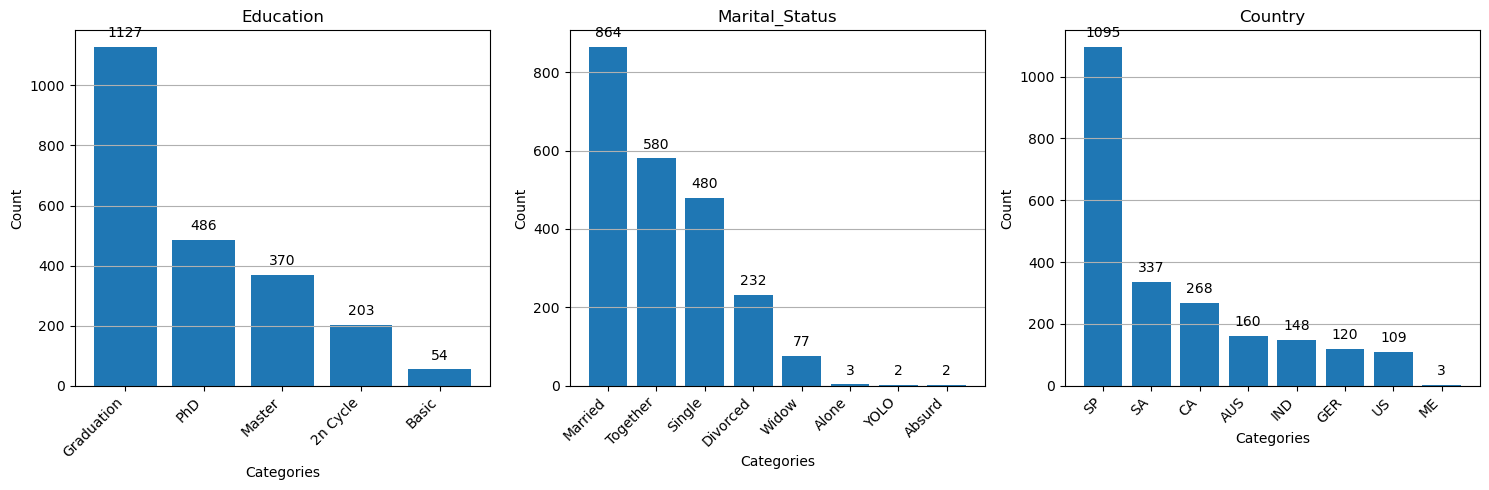

In [38]:
# List of categorical variables
categorical_variables = ['Education', 'Marital_Status', 'Country']  # Example list of categorical variables

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(15, 5))

for i, var in enumerate(categorical_variables):
    # Count the frequency of unique values
    value_counts = final_df[var].value_counts()
    
    # Plot bar chart
    ax = axes[i]
    ax.bar(value_counts.index, value_counts)
    ax.set_title(var)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.grid(axis='y')
    
    # Rotate category names
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')  # Adjust rotation angle as needed
    
    # Add annotations
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height()}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\2547910356.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed
C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\2547910356.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed


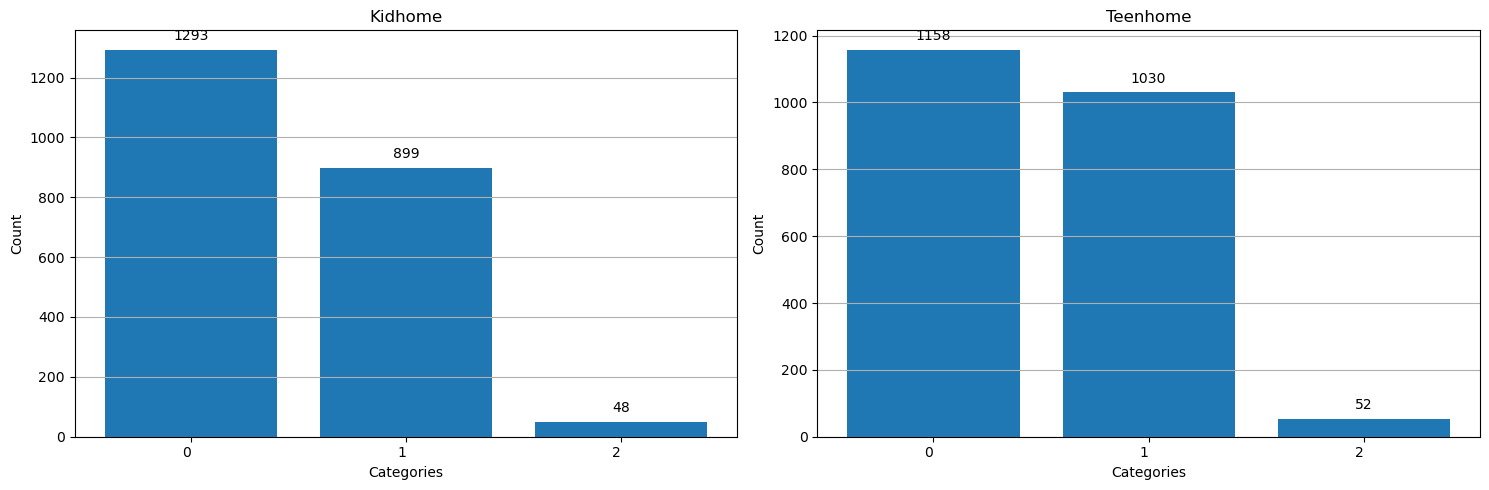

In [39]:
# List of categorical variables
categorical_variables = ['Kidhome', 'Teenhome']  # Example list of categorical variables

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(15, 5))

for i, var in enumerate(categorical_variables):
    # Count the frequency of unique values
    value_counts = final_df[var].value_counts()
    
    # Plot bar chart
    ax = axes[i]
    ax.bar(value_counts.index, value_counts)
    ax.set_title(var)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.grid(axis='y')
    
    # Rotate category names
    ax.set_xticklabels(value_counts.index, ha='right')  # Adjust rotation angle as needed
    
    # Add annotations
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height()}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

## Understanding the distribution of numerical columns with respect to Response

## Income v/s Total Purchases

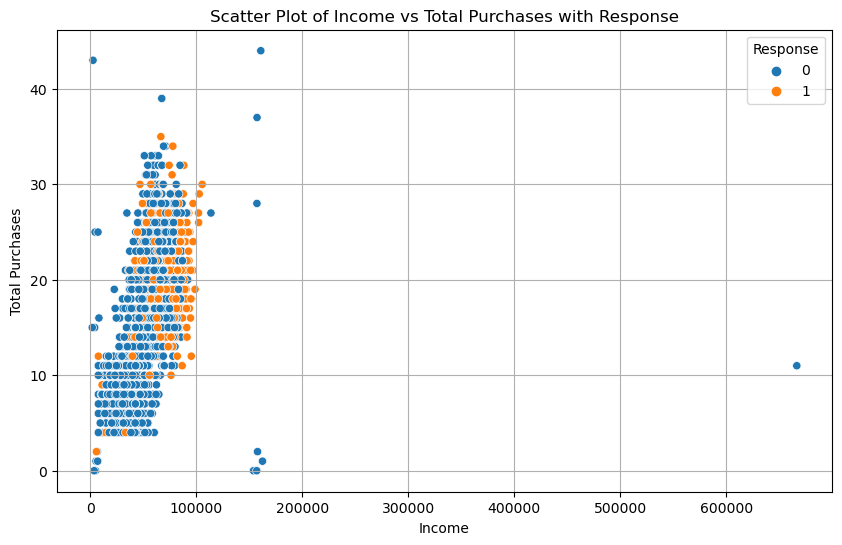

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Income', y='Total_Purchases', hue='Response')
plt.title('Scatter Plot of Income vs Total Purchases with Response')
plt.xlabel('Income')
plt.ylabel('Total Purchases')
plt.legend(title='Response')
plt.grid(True)
plt.show()

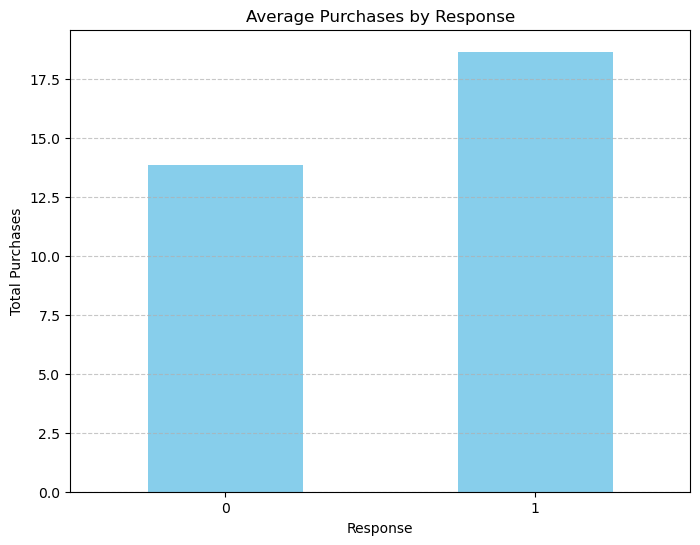

In [41]:
# Calculate the sum total purchases for each response category
sum_total_purchases = final_df.groupby('Response')['Total_Purchases'].mean()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sum_total_purchases.plot(kind='bar', color='skyblue')
plt.title('Average Purchases by Response')
plt.xlabel('Response')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

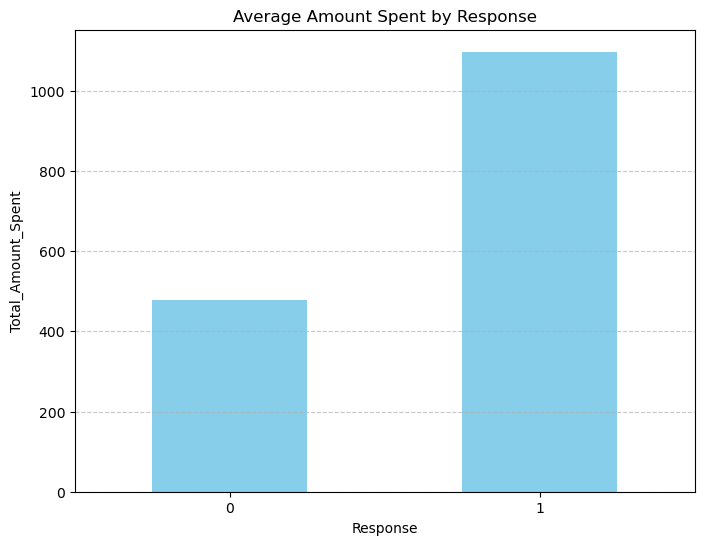

In [42]:
# Calculate the sum total purchases for each response category
sum_total_purchases = final_df.groupby('Response')['Total_Amount_Spent'].mean()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sum_total_purchases.plot(kind='bar', color='skyblue')
plt.title('Average Amount Spent by Response')
plt.xlabel('Response')
plt.ylabel('Total_Amount_Spent')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

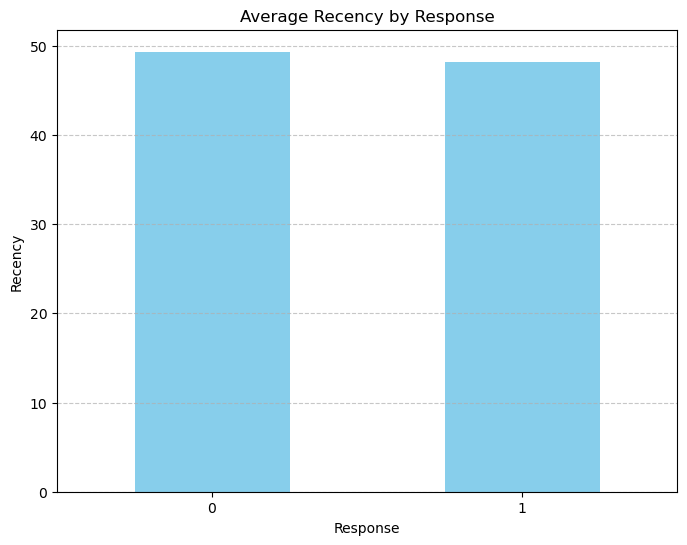

In [43]:
# Calculate the average recency for each response category
sum_total_purchases = final_df.groupby('Response')['Recency'].mean()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sum_total_purchases.plot(kind='bar', color='skyblue')
plt.title('Average Recency by Response')
plt.xlabel('Response')
plt.ylabel('Recency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

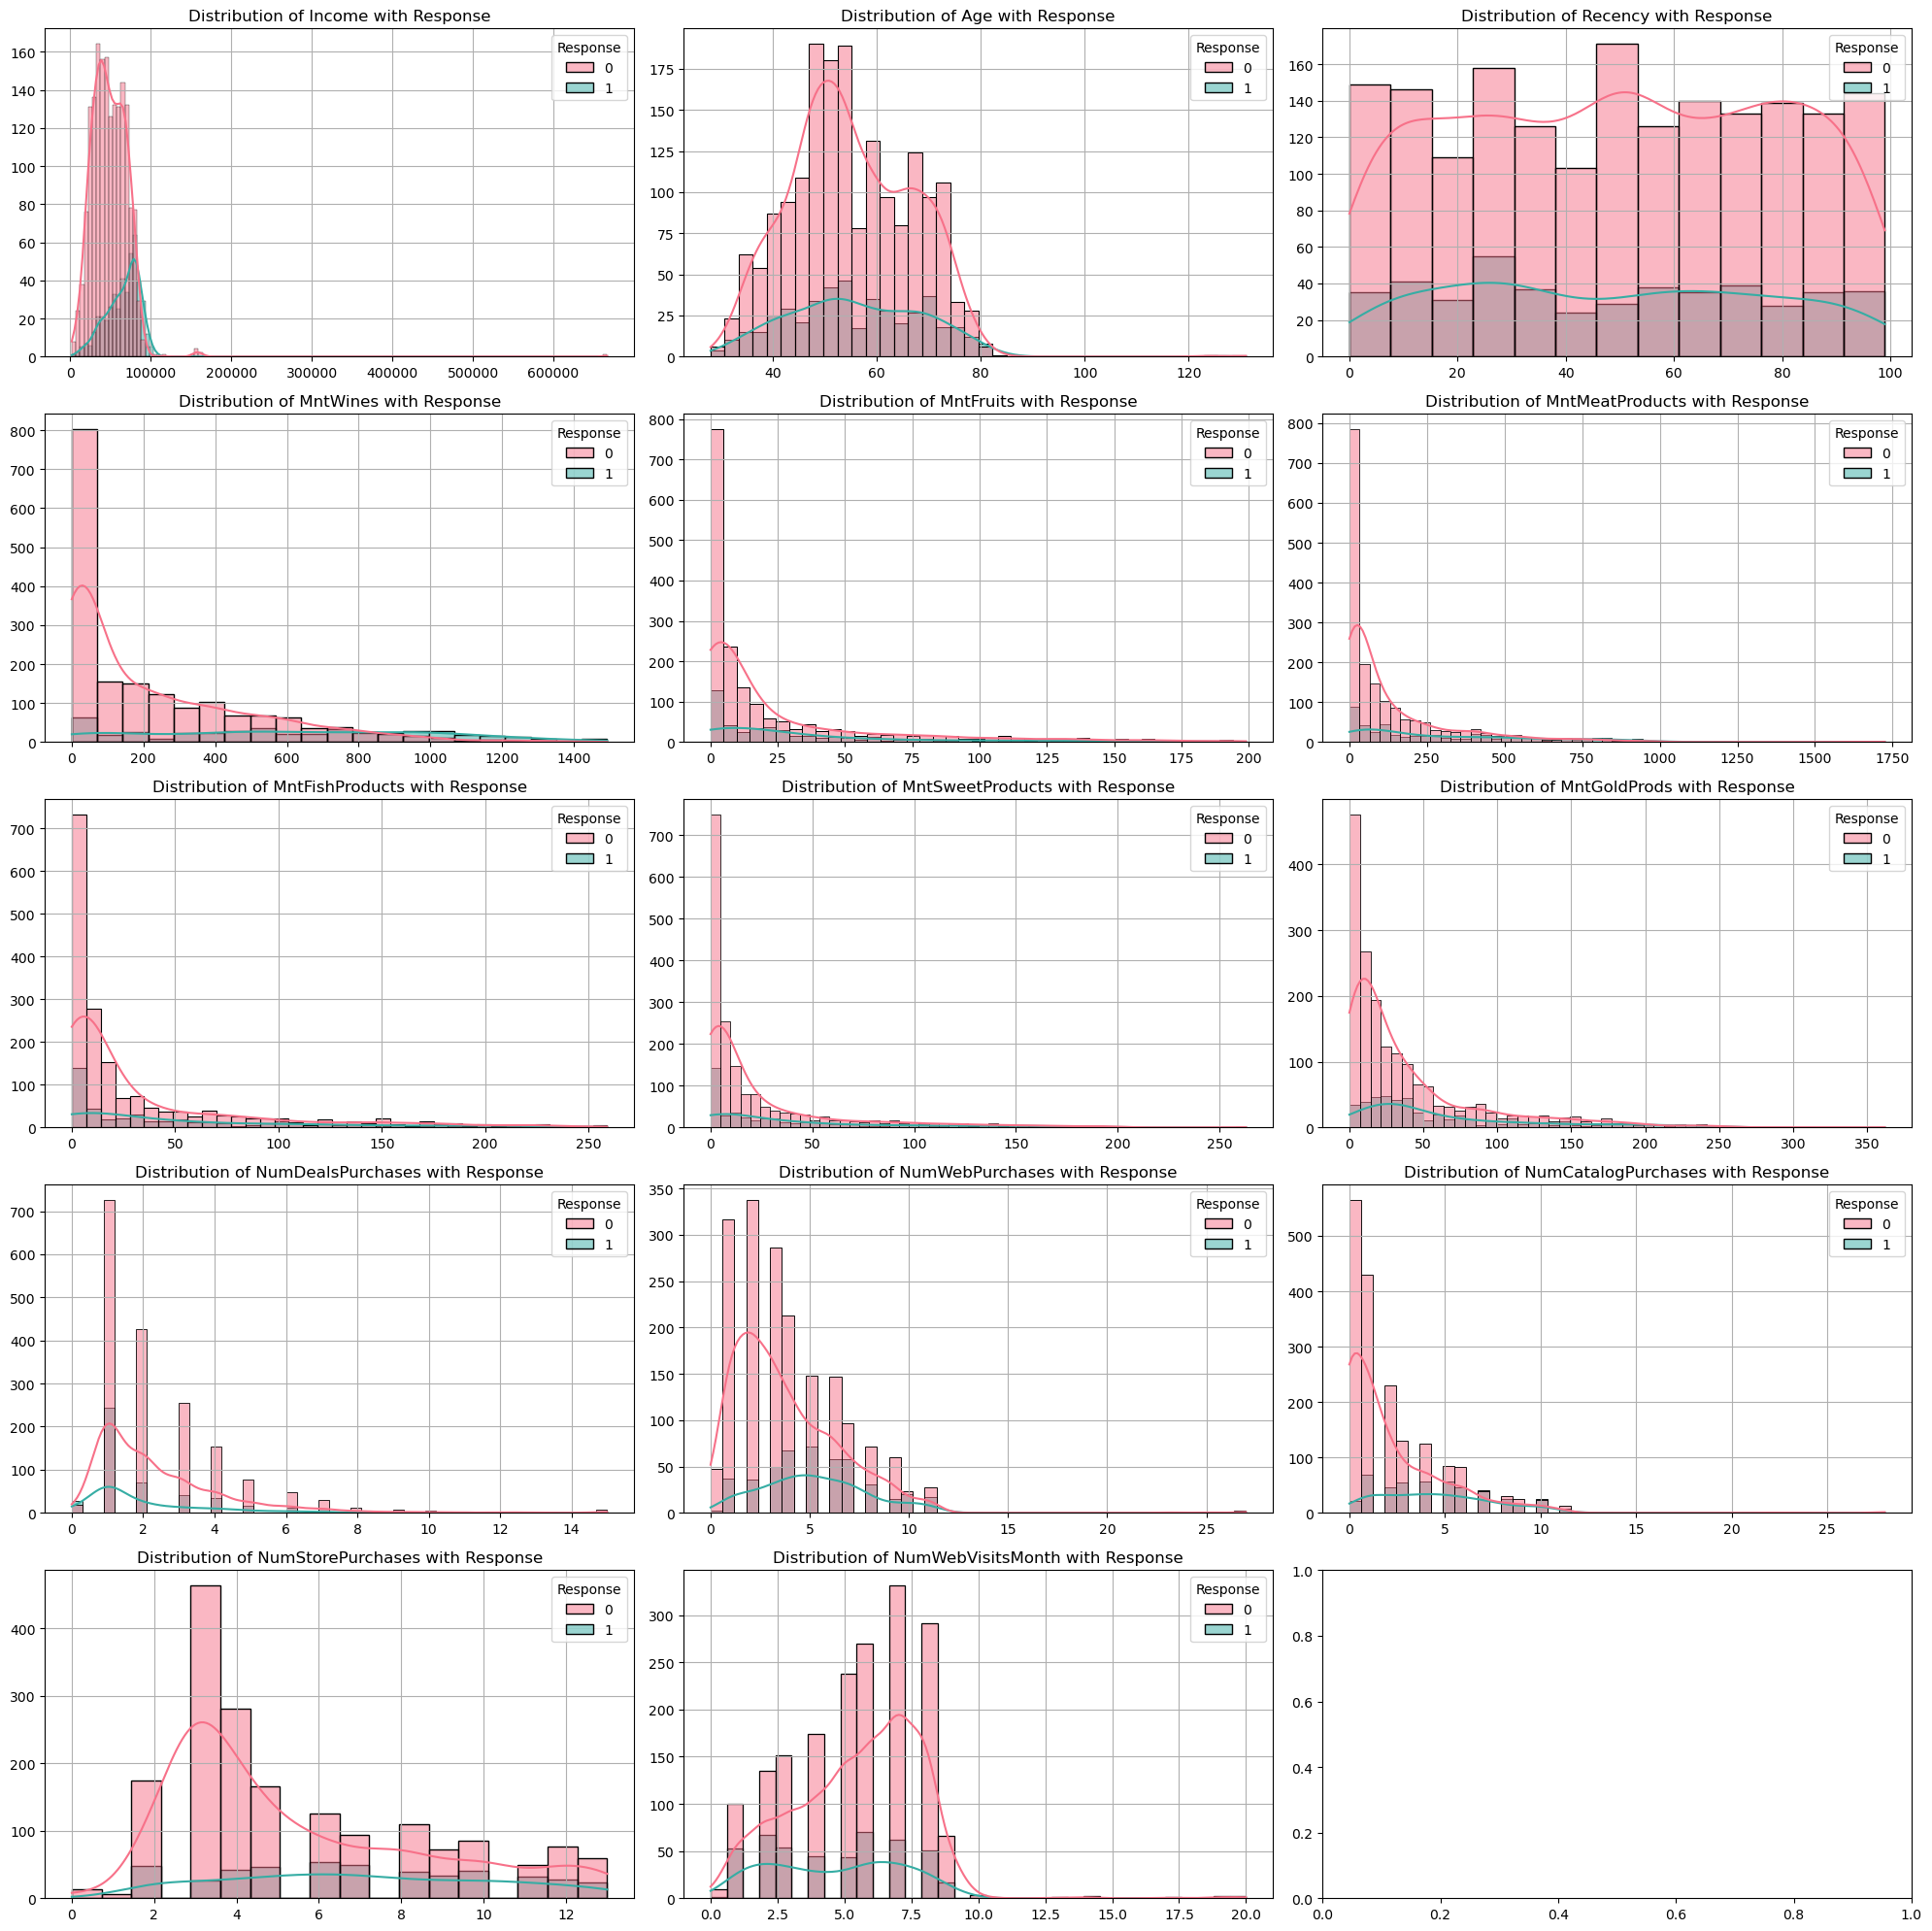

In [44]:
# Define the numerical columns
numerical_columns = ['Income','Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate the number of rows and columns for the subplots
num_rows = 5
num_cols = 3

# Set the height of each subplot
subplot_height = 4  # Adjust this value as needed

# Calculate the total height of the figure
total_height = subplot_height * num_rows

# Create subplots with reduced height
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, total_height))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through numerical columns and create a histogram for each
for i, col in enumerate(numerical_columns):
    ax = axs[i]
    sns.histplot(final_df, x=col, hue='Response', ax=ax, kde=True, palette='husl')
    ax.set_title(f'Distribution of {col} with Response')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

# Adjust layout
plt.tight_layout()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    4. Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?
</div>

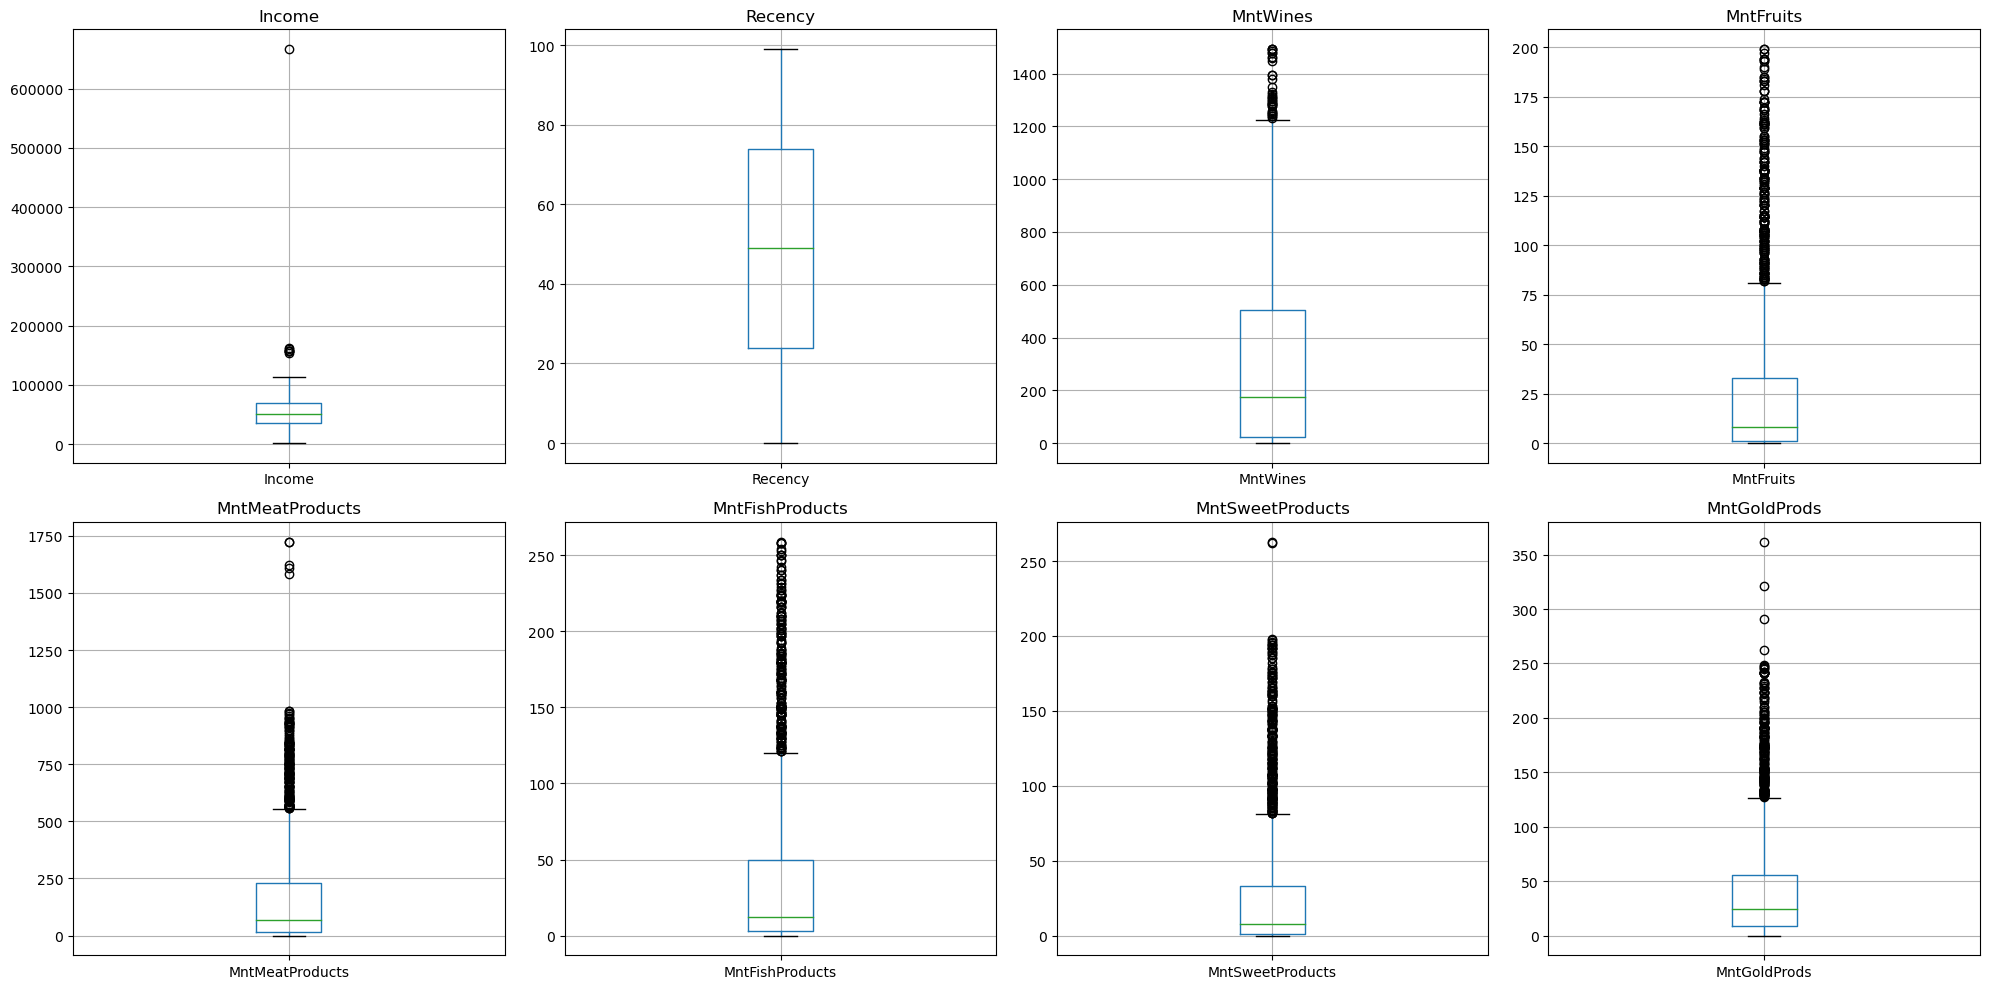

In [45]:
# Select specific columns for box plot
columns_of_interest = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(columns_of_interest):
    ax = axes[i // 4, i % 4]
    final_df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<div style="background-color: #ADD8E6; padding: 5px; border-radius: 5px; font-size: 20px; font-weight: bold">
   STEP - 3 : Business Analysis and Hypothesis (Task 2)
</div> 

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    5. Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 14px; font-weight: bold">
Formulating Hypotheses:

--> Null Hypothesis (H0): There is no significant difference in the mean amount spent on different categories between customers who responded positively (response = 1) and those who did not respond (response = 0) across different marketing campaigns.

#### Alternative Hypothesis (H1): There is a significant difference in the mean amount spent on different categories between customers who responded positively and those who did not respond across different marketing campaigns.
</div>

In [46]:
# Define the categories of amount spent
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize lists to store results
results = []
categories_col = []
t_statistic_col = []
p_value_col = []

# Iterate over each category
for category in categories:
    # Perform t-test for the category between response groups
    response_0_data = final_df[final_df['Response'] == 0][category]
    response_1_data = final_df[final_df['Response'] == 1][category]
    
    t_statistic, p_value = stats.ttest_ind(response_0_data, response_1_data)
    
    # Append results to lists
    categories_col.append(category)
    t_statistic_col.append(t_statistic)
    p_value_col.append(p_value)

# Create DataFrame to store results
results_df = pd.DataFrame({
    'Category': categories_col,
    'T-Statistic': t_statistic_col,
    'P-Value': p_value_col
})

# Print results
print(results_df)

           Category  T-Statistic        P-Value
0          MntWines   -24.928932  2.956191e-121
1         MntFruits    -6.322610   3.095000e-10
2   MntMeatProducts   -13.778360   1.620541e-41
3   MntFishProducts    -7.872955   5.351005e-15
4  MntSweetProducts    -7.687954   2.222422e-14
5      MntGoldProds    -9.154464   1.196196e-19


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting The Results From Above Table
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 14px; font-weight: bold">    

The p-values for all categories are significantly smaller than the chosen significance level (e.g., 0.05),

Therefore we conclude that alternate hypothesis is true and there is a significant difference in the mean amount spent on different categories between customers who responded positively and those who did not respond across different marketing campaigns.

</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    6. Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc
</div>

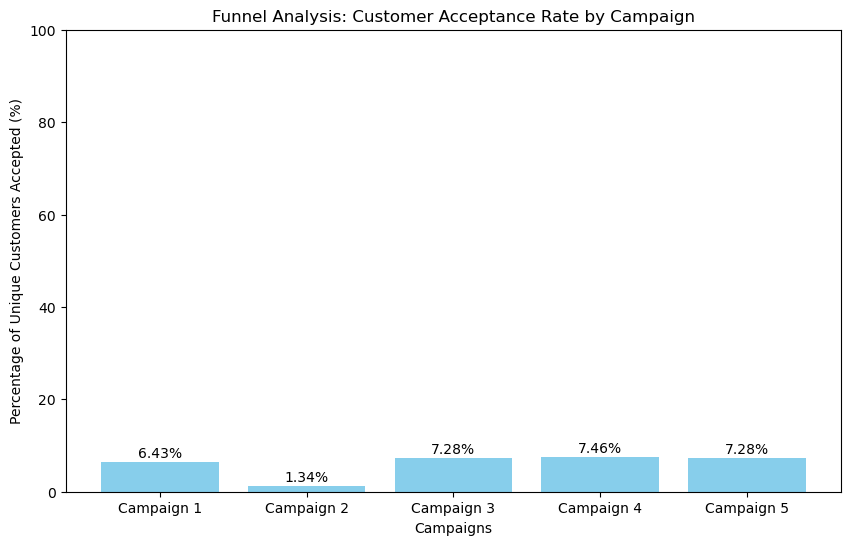

In [47]:
campaign_acceptance_counts = []
total_customers = len(final_df['ID'].unique())

for i in range(1, 6):
    campaign_acceptance_counts.append(len(final_df[final_df[f'AcceptedCmp{i}'] == 1]['ID'].unique()))

# Calculate the percentage of unique customers who accepted each campaign
campaign_acceptance_percentages = [count / total_customers * 100 for count in campaign_acceptance_counts]

# Campaign names
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']

# Plot the funnel analysis
plt.figure(figsize=(10, 6))
plt.bar(campaigns, campaign_acceptance_percentages, color='skyblue')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Unique Customers Accepted (%)')
plt.title('Funnel Analysis: Customer Acceptance Rate by Campaign')
plt.ylim(0, 100)

# Annotate the bars with their values
for i, percentage in enumerate(campaign_acceptance_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.show()

In [48]:
binary_columns = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']]

In [49]:
# Create an empty DataFrame to store the summary
summary_table = pd.DataFrame()

# Iterate over each column and calculate value counts
for column in binary_columns.columns:
    value_counts = binary_columns[column].value_counts()
    summary_table[column] = value_counts

# Transpose the summary table for better readability
summary_table = summary_table.T

# Rename the index for better clarity
summary_table.index.name = 'Column'

# Rename the columns for better clarity
summary_table.columns = ['0', '1']

# Print the summary table
print(summary_table)

                 0    1
Column                 
AcceptedCmp1  2096  144
AcceptedCmp2  2210   30
AcceptedCmp3  2077  163
AcceptedCmp4  2073  167
AcceptedCmp5  2077  163
Response      1777  463
Complain      2219   21


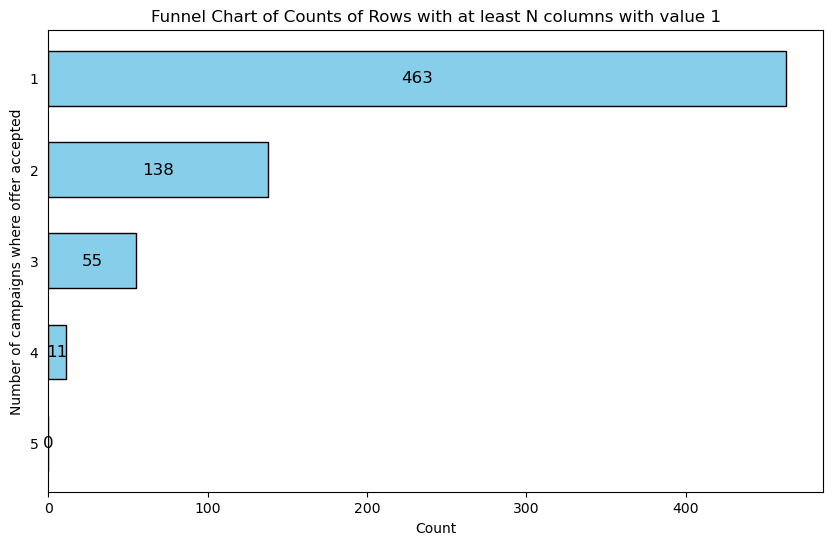

In [50]:
# Select the specified columns
binary_columns = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

# Define the thresholds
thresholds = [1, 2, 3, 4, 5]

# Create a dictionary to store the counts for each threshold
counts = {}

# Iterate over each threshold
for threshold in thresholds:
    # Count the number of rows where the sum of values is greater than or equal to the threshold
    count = (binary_columns.sum(axis=1) >= threshold).sum()
    counts[threshold] = count

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Reverse the order of thresholds and counts
thresholds.reverse()
counts_df = counts_df.reindex(thresholds)

# Plot the counts as a funnel chart with larger bars at the top
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Calculate the width of each section of the funnel
total_count = counts_df['Count'].sum()
section_widths = [counts_df['Count'][threshold] / total_count for threshold in thresholds]

# Plot each section of the funnel
for i, threshold in enumerate(thresholds):
    plt.barh([i], counts_df.loc[threshold, 'Count'], color='skyblue', height=0.6, edgecolor='black')

# Add annotations to the bars
for i, threshold in enumerate(thresholds):
    plt.text(counts_df.loc[threshold, 'Count'] / 2, i, str(int(counts_df.loc[threshold, 'Count'])),
             ha='center', va='center', color='black', fontsize=12)

# Add title and labels
plt.title('Funnel Chart of Counts of Rows with at least N columns with value 1')
plt.xlabel('Count')
plt.ylabel('Number of campaigns where offer accepted')
plt.yticks(range(len(thresholds)), thresholds)

# Remove y-axis ticks
plt.tick_params(axis='y', which='both', left=False)

# Show plot
plt.show()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    7. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products
</div>

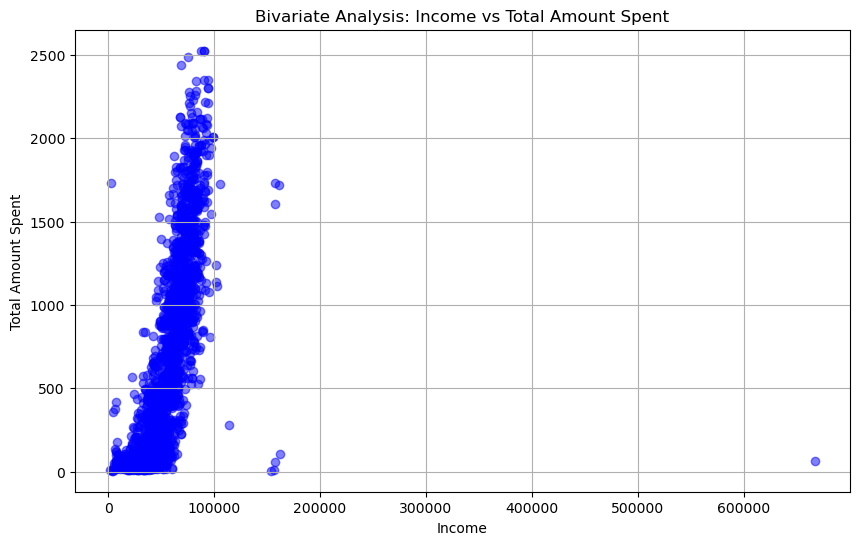

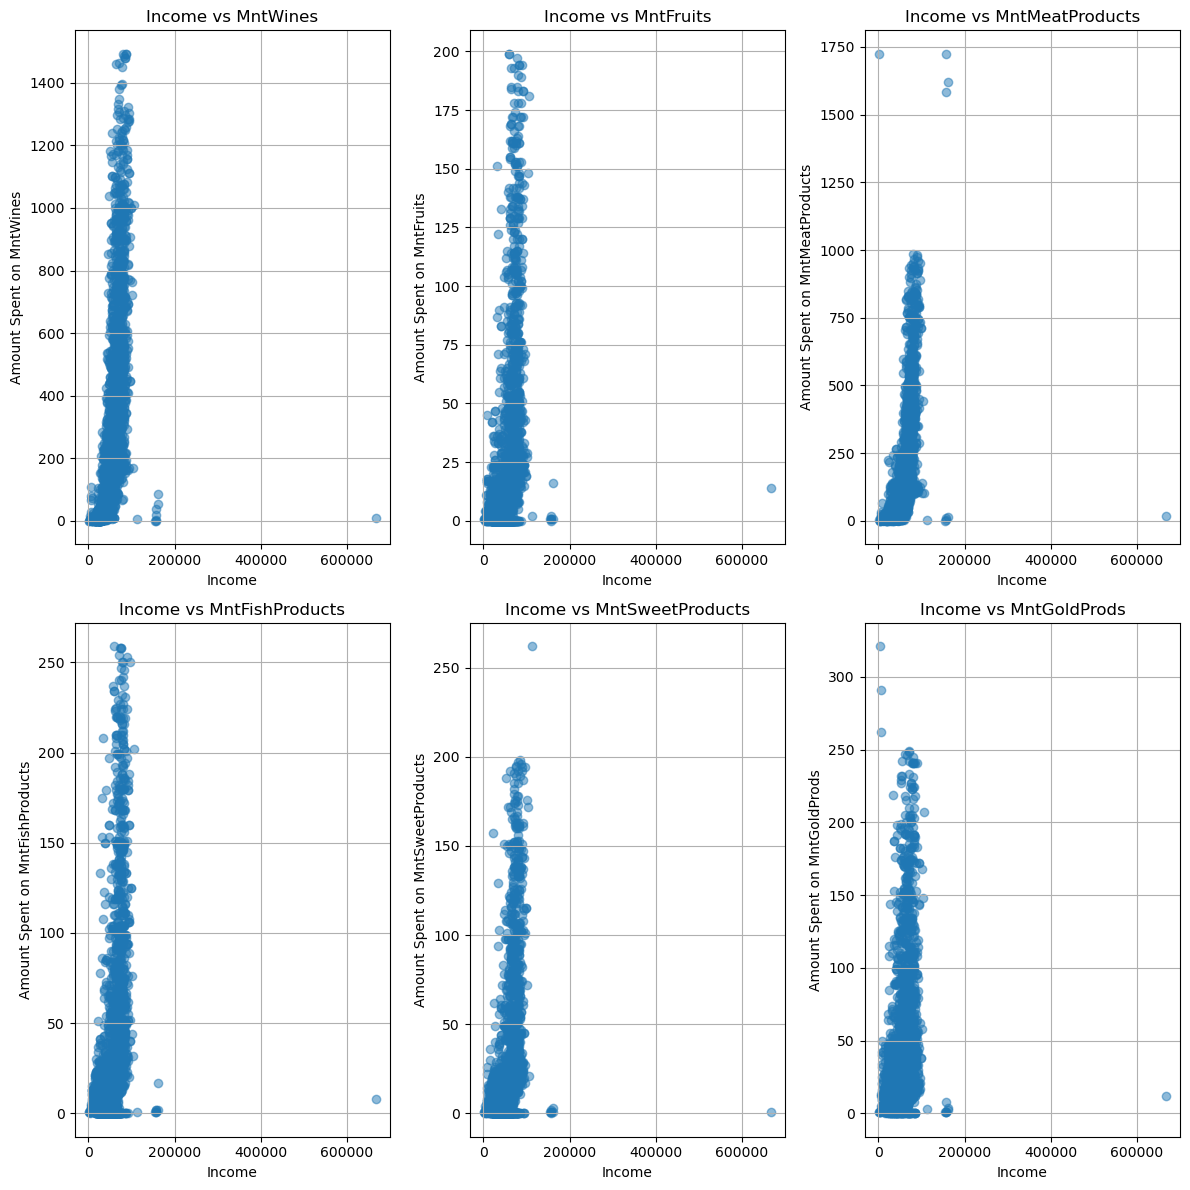

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Income'], final_df['Total_Amount_Spent'], alpha=0.5, color='blue')
plt.title('Bivariate Analysis: Income vs Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

# Define the columns to be analyzed
columns_to_analyze = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each product column (excluding 'Income')
for i, column in enumerate(columns_to_analyze[1:], start=1):
    # Scatter plot
    axs[i-1].scatter(final_df['Income'], final_df[column], alpha=0.5)
    axs[i-1].set_title(f'Income vs {column}')
    axs[i-1].set_xlabel('Income')
    axs[i-1].set_ylabel(f'Amount Spent on {column}')
    axs[i-1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

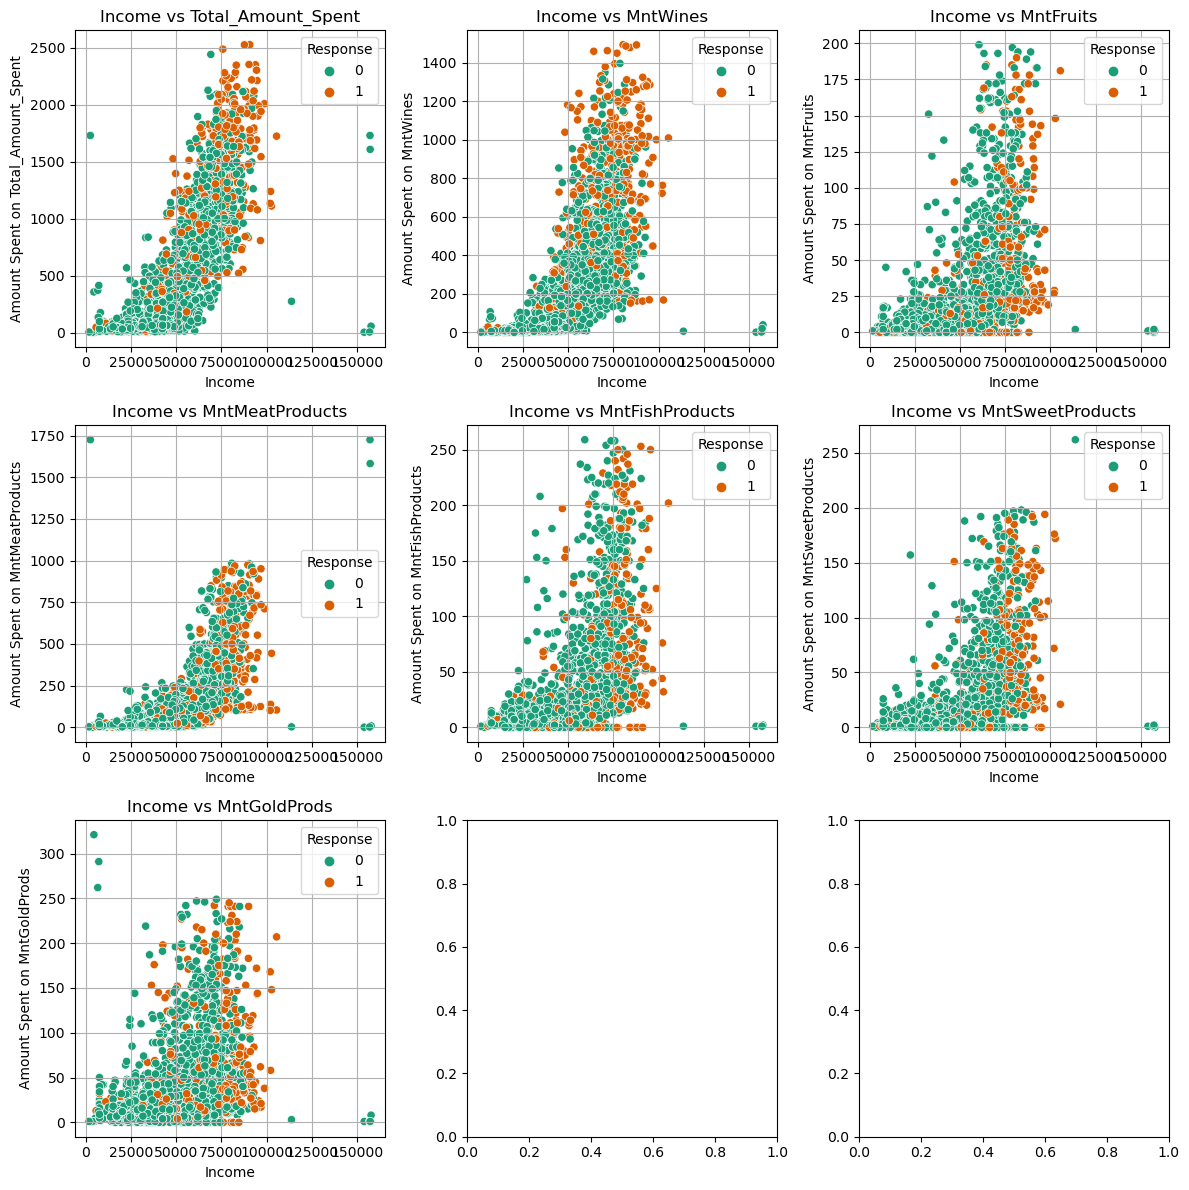

In [52]:
columns_to_analyze = ['Income', 'Total_Amount_Spent','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Filter the DataFrame for incomes less than or equal to 160000
filtered_df = final_df[final_df['Income'] <= 160000]

# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 2 columns

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate over each product column (excluding 'Income')
for i, column in enumerate(columns_to_analyze[1:], start=1):
    # Scatter plot with hue
    sns.scatterplot(data=filtered_df, x='Income', y=column, hue='Response', ax=axs[i-1], palette='Dark2')
    axs[i-1].set_title(f'Income vs {column}')
    axs[i-1].set_xlabel('Income')
    axs[i-1].set_ylabel(f'Amount Spent on {column}')
    axs[i-1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    8. Can you test the hypothesis that recent customers complain less in general compared to older customers?
</div>

In [53]:
# Convert 'Dt_Customer' column to datetime format
final_df['Dt_Customer'] = pd.to_datetime(final_df['Dt_Customer'])

# Find the oldest and most recent dates
oldest_date = final_df['Dt_Customer'].min()
most_recent_date = final_df['Dt_Customer'].max()

print("Oldest Date:", oldest_date)
print("Most Recent Date:", most_recent_date)

C:\Users\shikh\AppData\Local\Temp\ipykernel_14916\328040276.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Dt_Customer'] = pd.to_datetime(final_df['Dt_Customer'])


Oldest Date: 2012-07-30 00:00:00
Most Recent Date: 2014-06-29 00:00:00


In [54]:
# Define recent and older customers based on a threshold (e.g., join date)
threshold_date = pd.to_datetime('2014-01-01')  # Example threshold date
recent_customers = final_df[final_df['Dt_Customer'] >= threshold_date]
older_customers = final_df[final_df['Dt_Customer'] < threshold_date]

# Count complaints for recent and older customers
recent_complaints = recent_customers['Complain'].sum()
older_complaints = older_customers['Complain'].sum()

# Total number of recent and older customers
total_recent_customers = recent_customers.shape[0]
total_older_customers = older_customers.shape[0]

# Create contingency table for chi-square test
contingency_table = [[recent_complaints, total_recent_customers - recent_complaints],
                     [older_complaints, total_older_customers - older_complaints]]

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 0.7628363648756273
p-value: 0.3824423445637971


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting the Results:
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 12px; font-weight: bold">
--> If the p-value is less than the chosen significance level (e.g., 0.05), reject the null hypothesis and conclude that recent customers complain less in general compared to older customers.
    
    
--> If the p-value is greater than the significance level, fail to reject the null hypothesis, indicating no significant difference in complaint rates between recent and older customers.
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    9. Do people who accept the offer in the first campaign also accept in any other campaign?
</div>

In [55]:
# Select relevant columns
campaign_data = final_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

# Create a contingency table
contingency_table = pd.crosstab(campaign_data['AcceptedCmp1'], 
                                [campaign_data['AcceptedCmp2'], campaign_data['AcceptedCmp3'], 
                                 campaign_data['AcceptedCmp4'], campaign_data['AcceptedCmp5']],
                                rownames=['AcceptedCmp1'], colnames=['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 463.55584709180073
p-value: 2.6775097340913834e-93


<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
Interpreting the Results:
</div>

<div style="background-color: rgba(255, 165, 0, 0.5); padding: 5px; border-radius: 5px; font-size: 12px; font-weight: bold">
-->  Since the p-value (2.6775097340913834e-93) is significantly less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.
    
-->  Therefore, we conclude that there is a significant association between accepting offers in the first campaign and accepting offers in other campaigns.
</div>

<div style="background-color: #90EE90; padding: 5px; border-radius: 5px; font-size: 16px; font-weight: bold">
    10. Profile of people who respond vs. who don’t.
</div>

In [56]:
# Define bins for recency
recency_bins = [-1, 30, 60, 90, 100]

# Create bins for recency
final_df['Recency_Bin'] = pd.cut(final_df['Recency'], bins=recency_bins, labels=['0-30', '31-60', '61-90', '90+'])

# Display the DataFrame with the new recency bins
print(final_df[['Recency', 'Recency_Bin']].head())

   Recency Recency_Bin
0        0        0-30
1        0        0-30
2        0        0-30
3        0        0-30
4        0        0-30


In [57]:
final_df['Recency_Bin'].value_counts()

Recency_Bin
0-30     724
61-90    664
31-60    654
90+      198
Name: count, dtype: int64

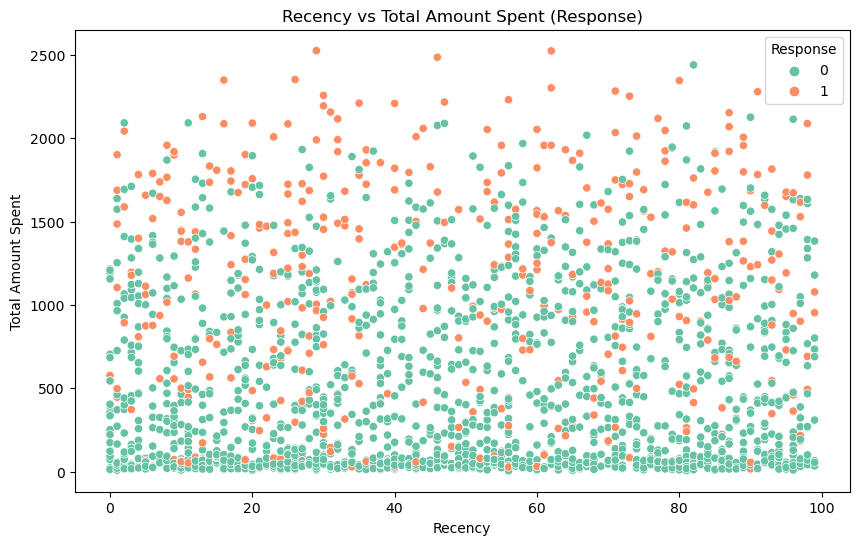

In [58]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Recency', y='Total_Amount_Spent', hue='Response', palette='Set2')

# Add labels and title
plt.title('Recency vs Total Amount Spent (Response)')
plt.xlabel('Recency')
plt.ylabel('Total Amount Spent')

# Show plot
plt.show()

In [59]:
## Define bins for age
age_bins = [20, 40, 60, 80, 100, float('inf')]

## Create bins for age
final_df['Age_Bin'] = pd.cut(final_df['Age'], bins=age_bins, labels=['20-39', '40-59', '60-79', '80-99', '100+'])

## Display the DataFrame with the new age bins
print(final_df[['Age', 'Age_Bin']].head())

   Age Age_Bin
0   54   40-59
1   63   60-79
2   66   60-79
3   57   40-59
4   35   20-39


In [60]:
# Define bins for income
income_bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]

# Create bins for income
final_df['Income_Bin'] = pd.cut(final_df['Income'], bins=income_bins, labels=['0-99k', '100k-199k', '200k-299k', '300k-399k', '400k-499k', '500k+'])

# Display the DataFrame with the new income bins
print(final_df[['Income', 'Income_Bin']].head())

    Income Income_Bin
0  84835.0      0-99k
1  57091.0      0-99k
2  67267.0      0-99k
3  32474.0      0-99k
4  21474.0      0-99k


In [61]:
final_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Total_Amount_Spent,Total_Purchases,Recency_Bin,Age_Bin,Income_Bin
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,SP,0,...,0,0,0,0,54,1190,15,0-30,40-59,0-99k
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,CA,0,...,0,0,1,0,63,577,18,0-30,60-79,0-99k
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,US,0,...,0,0,0,0,66,251,11,0-30,60-79,0-99k
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,AUS,0,...,0,0,0,0,57,11,4,0-30,40-59,0-99k
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,SP,0,...,0,0,1,0,35,91,8,0-30,20-39,0-99k


In [62]:
final_df['Income_Bin'].value_counts()

Income_Bin
0-99k        2203
100k-199k      12
500k+           1
200k-299k       0
300k-399k       0
400k-499k       0
Name: count, dtype: int64

In [63]:
final_df['Age_Bin'].value_counts()

Age_Bin
40-59    1237
60-79     732
20-39     259
80-99       9
100+        3
Name: count, dtype: int64

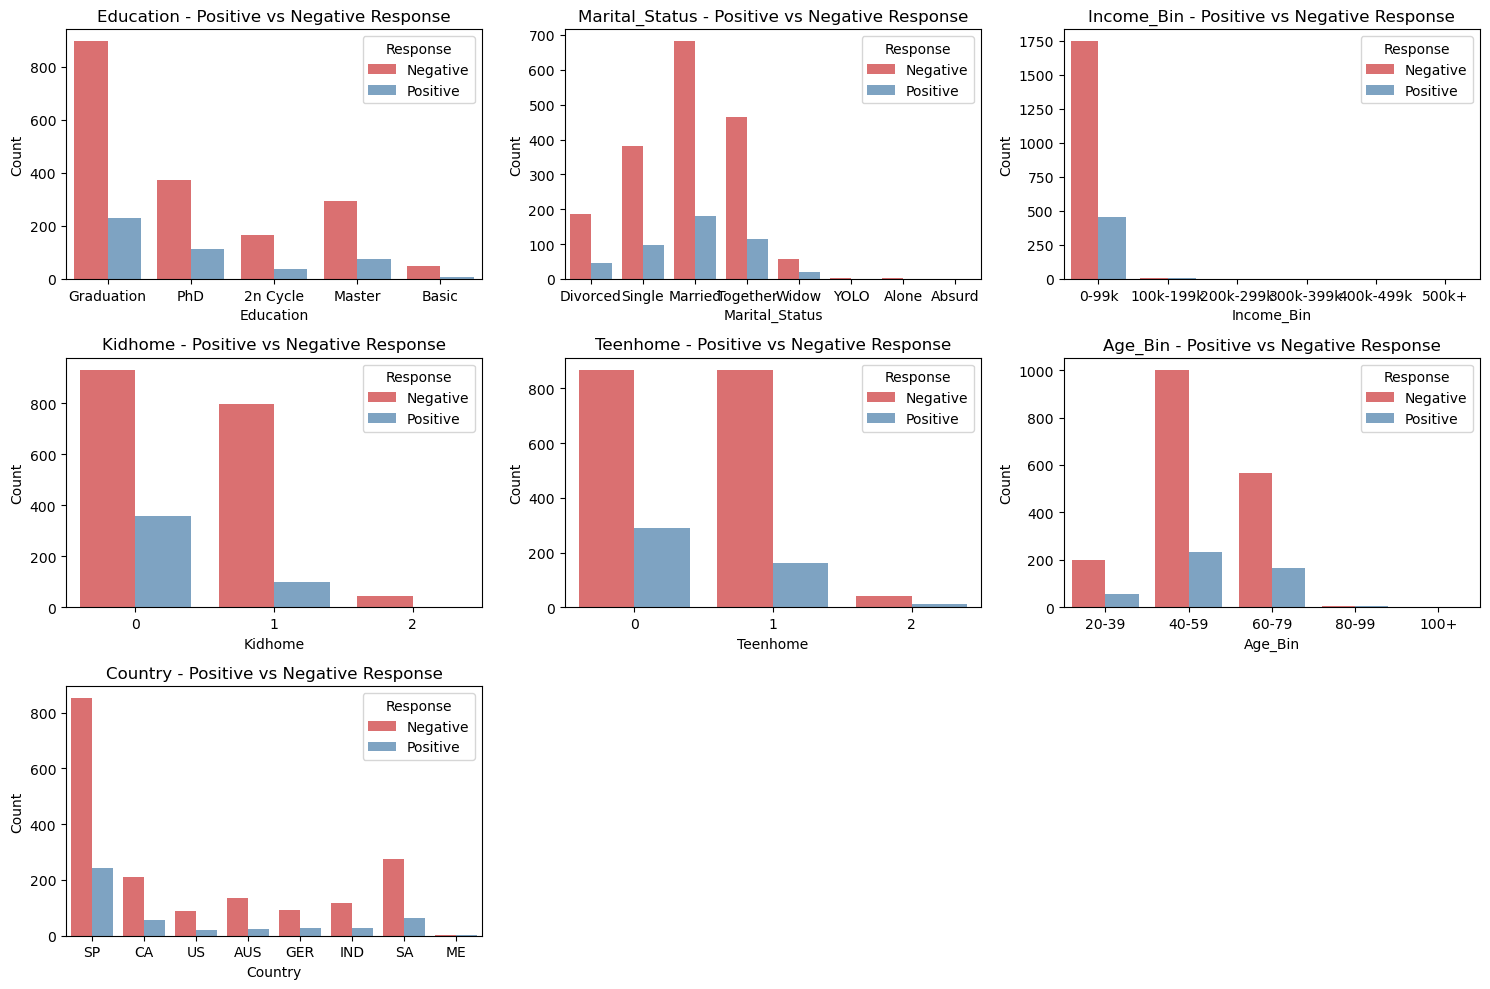

In [64]:
# Select columns for comparison
columns_to_compare = ['Education', 'Marital_Status', 'Income_Bin', 'Kidhome', 'Teenhome', 'Age_Bin', 'Country']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a countplot
for i, column in enumerate(columns_to_compare, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=final_df, x=column, hue='Response', palette='Set1', alpha=0.7)
    plt.title(f'{column} - Positive vs Negative Response')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Response', labels=['Negative', 'Positive'], loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Hypothesis: Customers who spend more on particular product category are more likely to respond positively to marketing campaigns promoting the respective product categories.

The p-value for MntWines is 0.0000
The difference in MntWines between customers who responded and those who did not respond to marketing campaigns is significant.
The p-value for MntFruits is 0.0000
The difference in MntFruits between customers who responded and those who did not respond to marketing campaigns is significant.
The p-value for MntMeatProducts is 0.0000
The difference in MntMeatProducts between customers who responded and those who did not respond to marketing campaigns is significant.
The p-value for MntFishProducts is 0.0000
The difference in MntFishProducts between customers who responded and those who did not respond to marketing campaigns is significant.
The p-value for MntSweetProducts is 0.0000
The difference in MntSweetProducts between customers who responded and those who did not respond to marketing campaigns is significant.
The p-value for MntGoldProds is 0.0000
The difference in MntGoldProds between customers who responded and those who did not respond to mark

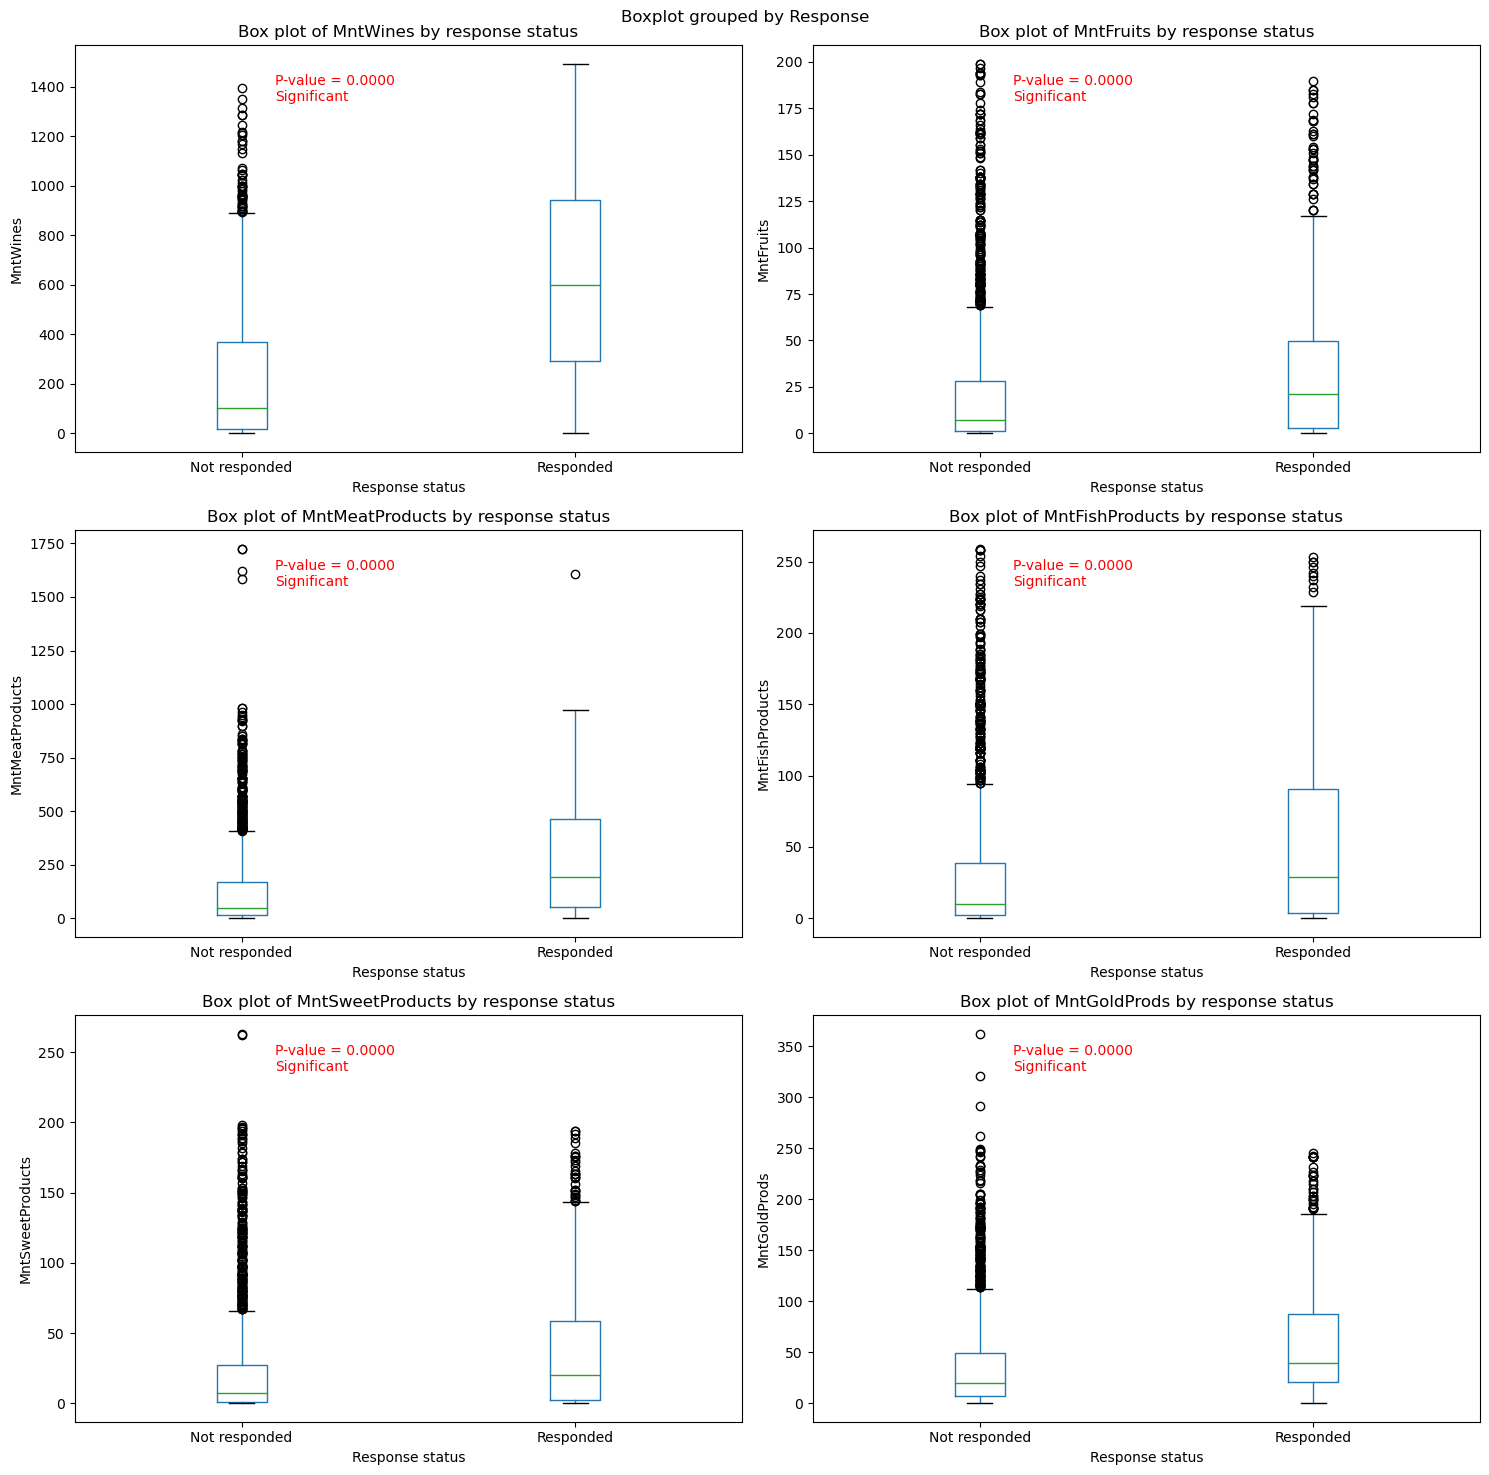

In [69]:
# Define the list of categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Define the response column
response_column = 'Response'

# Define significance level
alpha = 0.05

# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each category
for i, category in enumerate(categories):
    # Split data into groups based on response (0 = not responded, 1 = responded)
    responded = final_df[final_df[response_column] == 1][category]
    not_responded = final_df[final_df[response_column] == 0][category]

    # Perform t-test to compare means of the category between responded and not responded groups
    t_stat, p_value = stats.ttest_ind(responded, not_responded)

    # Visualization - Box plot of the category by response status
    ax = axes[i]
    final_df.boxplot(column=category, by=response_column, grid=False, ax=ax)
    ax.set_title(f"Box plot of {category} by response status")
    ax.set_ylabel(category)
    ax.set_xlabel("Response status")
    ax.set_xticklabels(['Not responded', 'Responded'])

    # Annotate the p-value on the plot
    if p_value < alpha:
        ax.text(1.1, final_df[category].max() * 0.9, f'P-value = {p_value:.4f}\nSignificant', fontsize=10, color='red')
    else:
        ax.text(1.1, final_df[category].max() * 0.9, f'P-value = {p_value:.4f}\nNot significant', fontsize=10, color='green')

    # Print p value
    print(f'The p-value for {category} is {p_value:.4f}')
    
    # Print the result
    if p_value < alpha:
        print(f"The difference in {category} between customers who responded and those who did not respond to marketing campaigns is significant.")
    else:
        print(f"There is no significant difference in {category} between customers who responded and those who did not respond to marketing campaigns.")

# Adjust layout
plt.tight_layout()
plt.show()

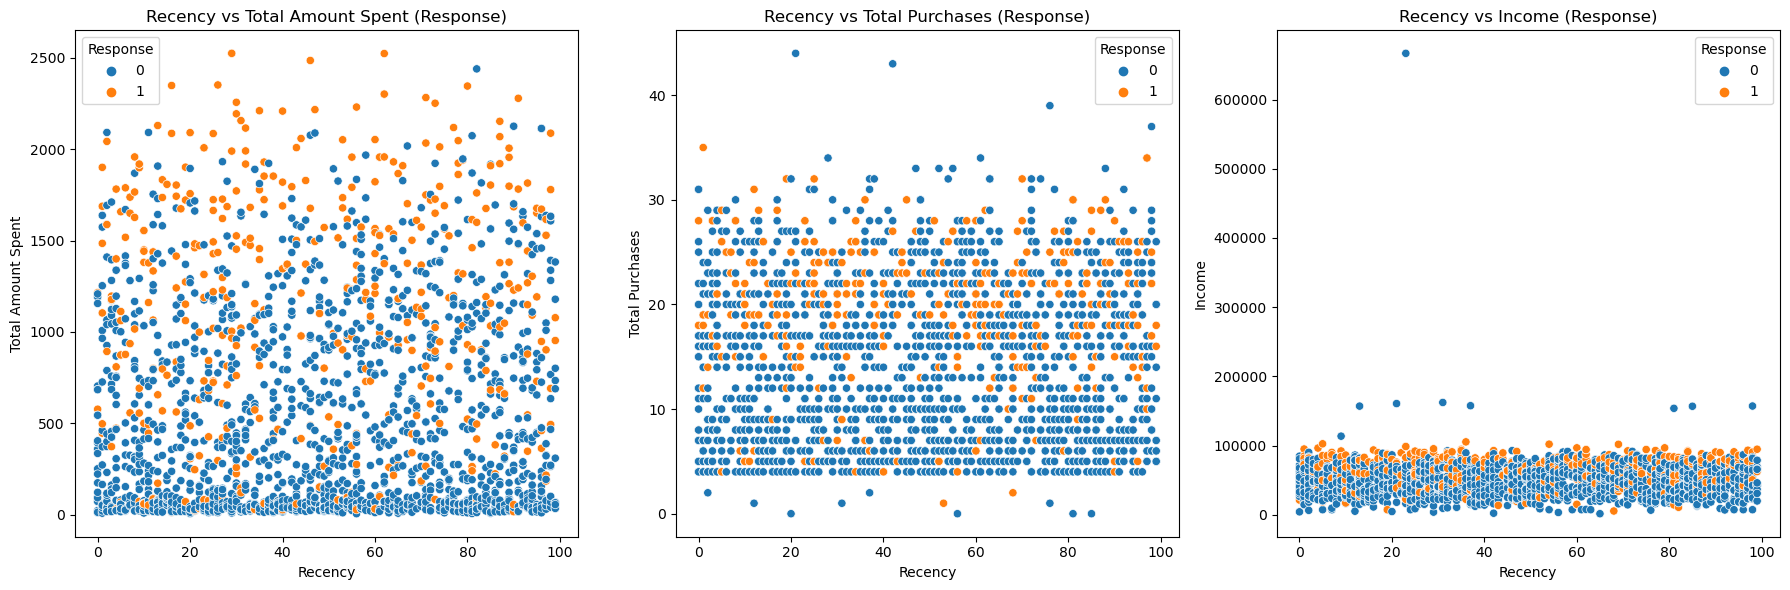

In [70]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Recency vs Total Amount Spent with Response as hue
sns.scatterplot(data=final_df, x='Recency', y='Total_Amount_Spent', hue='Response', ax=axs[0])
axs[0].set_title('Recency vs Total Amount Spent (Response)')
axs[0].set_xlabel('Recency')
axs[0].set_ylabel('Total Amount Spent')

# Plot Recency vs Total Purchases with Response as hue
sns.scatterplot(data=final_df, x='Recency', y='Total_Purchases', hue='Response', ax=axs[1])
axs[1].set_title('Recency vs Total Purchases (Response)')
axs[1].set_xlabel('Recency')
axs[1].set_ylabel('Total Purchases')

# Plot Recency vs Income with Response as hue
sns.scatterplot(data=final_df, x='Recency', y='Income', hue='Response', ax=axs[2])
axs[2].set_title('Recency vs Income (Response)')
axs[2].set_xlabel('Recency')
axs[2].set_ylabel('Income')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()